<a href="https://colab.research.google.com/github/amanullahshah32/Deep-Learning/blob/main/03_Pytorch_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Computer vision libraries in PyTorch

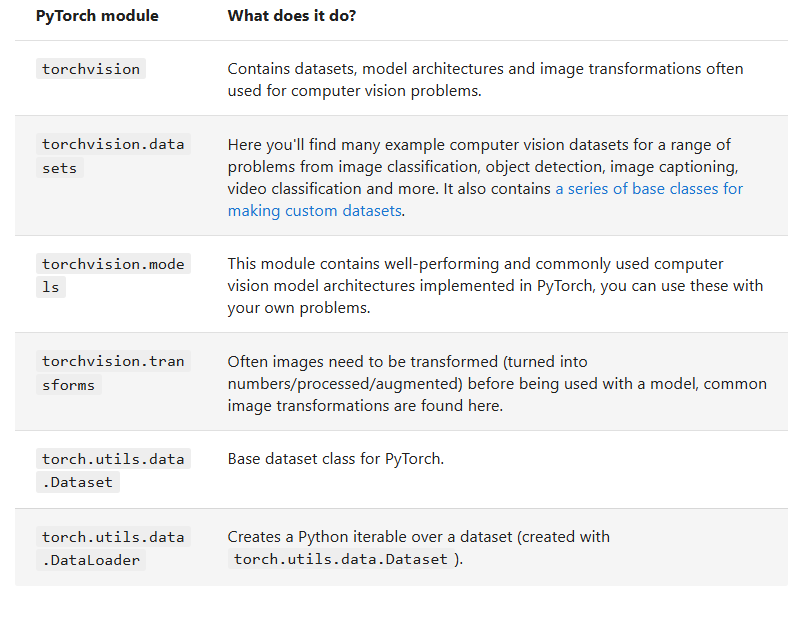

In [42]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from  torchvision import datasets
from torchvision.transforms import ToTensor

# import matplotlib as plt

# check versions:
print(f"PyTorch verison: {torch.__version__}")
print(f"TorchVision version: {torchvision.__version__}")

PyTorch verison: 2.3.1+cu121
TorchVision version: 0.18.1+cu121


## 1. Getting a dataset


In [43]:
# Setup training data
train_data = datasets.FashionMNIST(root='data', # where to download
                                   train = True, # get training data
                                   download= True, # donwload data if it doesn't exist on disk
                                   transform = ToTensor(), # images come as PIL format, we want to turn it into tensors
                                   target_transform = None # You can transform labels as well
                                   )

# Setup testing data
test_data = datasets.FashionMNIST(
    root='data',
    train=False, # get the test data
    download= True,
    transform = ToTensor()
)

In [44]:
# see first training sample

image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

### 1.1 Input and output shapes of a computer vision model

We've got a big tensor of values (the image) leading to a single value for the target (the label).



In [45]:
# What's the shape of the image?
image.shape

torch.Size([1, 28, 28])

In [46]:
torch.cuda.is_available()

True

The order of our current tensor is often referred to as CHW (Color Channels, Height, Width).

There's debate on whether images should be represented as CHW (color channels first) or HWC (color channels last).

Note: You'll also see NCHW and NHWC formats where N stands for number of images. For example if you have a batch_size=32, your tensor shape may be [32, 1, 28, 28]. We'll cover batch sizes later.

In [47]:
# how many samples are there
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [48]:
# See classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

### 1.2 Visualizing our data


Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

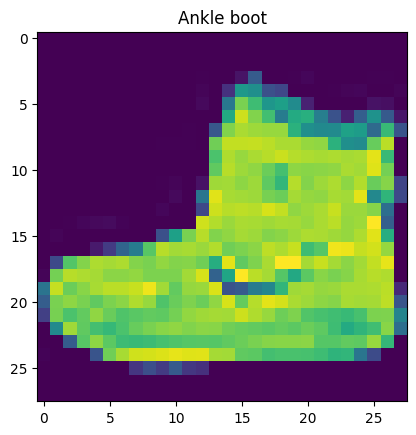

In [49]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shape is 1,28,28
plt.title(class_names[label])

we can turn the image into grayscale using the `cmap` parameter of `plt.imshow()`

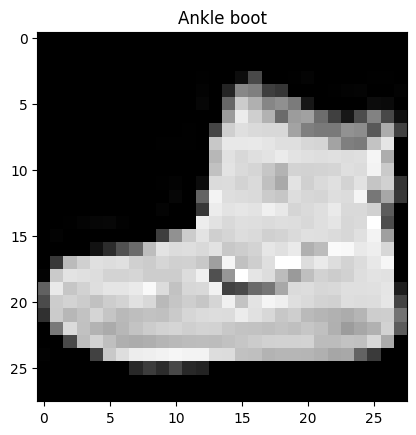

In [50]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label]);

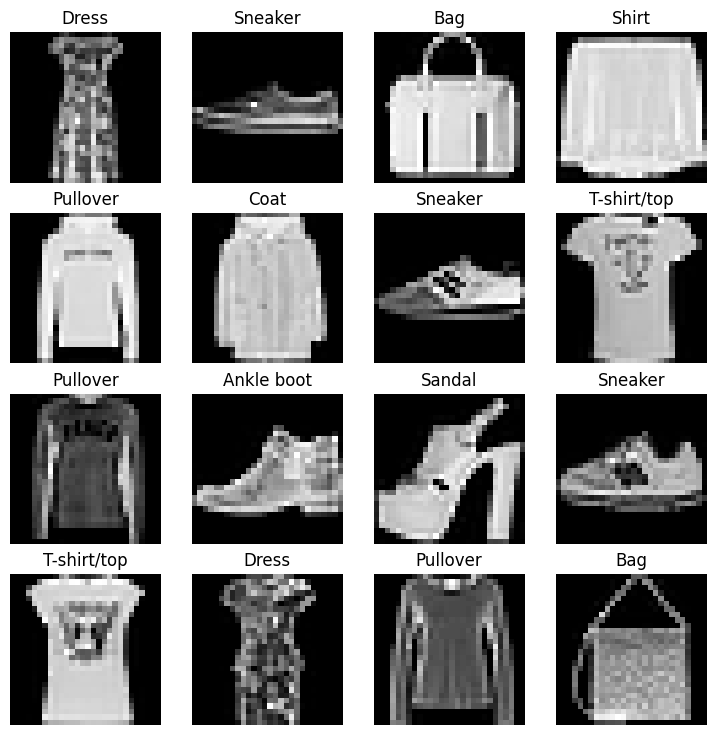

In [51]:
# Plot more images
torch.manual_seed(4)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4

for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data) , size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)

## 2. Prepare dataloader

Let's create dataloader's for our training and test sets

In [52]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data,  # dataset to turn into iterables
                              batch_size= BATCH_SIZE, # how many samples per batch
                              shuffle = True # shuffle data every epoch
                              )
test_dataloader = DataLoader(test_data,
                             batch_size = 32,
                             shuffle = False) # dont necessarily have to shuffle the testing data

# let's check out whats we have created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test Dataloader: {len(test_dataloader)} batcher os {32}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f517c803a30>, <torch.utils.data.dataloader.DataLoader object at 0x7f517d7c8580>)
Length of train_dataloader: 1875 batches of 32
Length of test Dataloader: 313 batcher os 32


In [53]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Imaze size: torch.Size([1, 28, 28])
label: 0, label_size: torch.Size([])


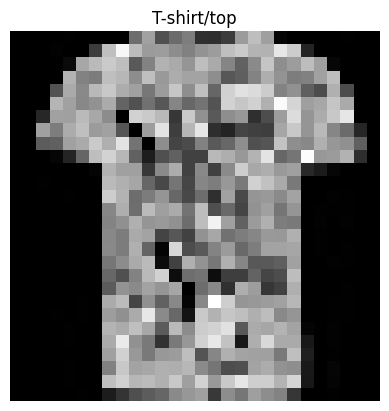

In [54]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f"Imaze size: {img.shape}")
print(f"label: {label}, label_size: {label.shape}")

## 3. Model 0: Build a baseline model

In [55]:
# create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)

# Get a single sample
x= train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what's happening
print(f"shape before flattening: {x.shape} [color channel, height , width]")
print(f"Shape after flattening: {output.shape}")

# #Try uncommenting below and see what happens
# print(f"x:{x}\n\n")
# print(output)

shape before flattening: torch.Size([1, 28, 28]) [color channel, height , width]
Shape after flattening: torch.Size([1, 784])


Let's create our first model using nn.Flatten() as the first layer.

In [56]:
from torch import nn
class FasionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # neural networks like their inputs iin vector form
        nn.Linear(in_features = input_shape, out_features = hidden_units), # in_features = number of features in a data sample (784 pixels)
        nn.Linear(in_features = hidden_units, out_features = output_shape)

        )

  def forward(self, x):
    return self.layer_stack(x)


In [57]:
torch.manual_seed(42)

# Need to setup model with input parameters
model_0 = FasionMNISTModelV0(input_shape = 784, # one for every pixel (28*28)
                              hidden_units= 10, # how many units in the hidden layers
                              output_shape=len(class_names)) # one for every class

model_0.to('cpu') ## Keep model on cpu to begin with

FasionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [58]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [59]:
model_0.parameters()

<generator object Module.parameters at 0x7f517d926f10>

### 3.1 Setup loss, optimizer and evaluation metrics

Since we're working on a classification problem, let's bring in our helper_functions.py script and subsequently the accuracy_fn() we defined in notebook 02.



In [60]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [61]:
# Import accuracy metric
from helper_functions import accuracy_fn # note: could also use torchmetrics.accuracy (task = 'multiclass', num_classes=len(class_names)).to(device)


In [62]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also claeed "criterion/cost" function in some places
optimizer = torch.optim.SGD(params = model_0.parameters() , lr =0.1)

### 3.2 Creating a funciton to time our experiments

In [63]:
# torch.device()

In [64]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
  """ Prints difference between start and end time.

  Args:
    start (float): start time of computation (preferred in timeit format).
    end (float): end time of computation
    device ([type], optional): device that compute is running on. Defaults to None.

  Returns:
    float: time between start and end in seconds (higher is longer).
  """

  total_time = end - start
  print(f"train time on {device} : {total_time:.3f} seconds")
  return total_time

### 3.3 Creating a training loop and training a model on batches of data

In [65]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create trianing and testing loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n ------- \n")
  ### Training
  train_loss = 0
  # Add a loop to loop through training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate the loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulatively add up the loss per epoch

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Print out how many samples have been seen
    if batch % 400 == 0:
      print(f"Looked at {batch*len(X)} / {len(train_dataloader.dataset)} samples")


  # Divide total train loss by length of train dataloader (average loss per batch per epoch)
  train_loss /= len(train_dataloader)


  ### Testing
  # Setup variables for accumulatively adding up loss and accuracy
  test_loss, test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for X,y in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X)

      # 2. Calculate the loss (accumatively)
      test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

      # 3. Calculate accuracy ( preds need to be same as y_true)
      test_acc += accuracy_fn(y_true= y, y_pred= test_pred.argmax(dim=1))

    # Calculations on test metrics need to happen inside torch.inference_mode()
    # Divide total test loss by length of test dataloader (per batch)
    test_loss /= len(test_dataloader)

    # divide total accuracy by length of test dataloader (per batch)
    test_acc /= len(test_dataloader)

  # Prin out what's happening
  print(f"\nTrain loss: {train_loss:.5f} | Test_loss: {test_loss:.5f} | Test_acc:{test_acc:.2f} \n \n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
 ------- 

Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss: 0.59039 | Test_loss: 0.50954 | Test_acc:82.04 
 

Epoch: 1 
 ------- 

Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss: 0.47633 | Test_loss: 0.47989 | Test_acc:83.20 
 

Epoch: 2 
 ------- 

Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss: 0.45503 | Test_loss: 0.47664 | Test_acc:83.43 
 

train time on cpu : 28.749 seconds


In [66]:
torch.cuda.is_available()

True

In [67]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model_0.to(device)


In [68]:
# # Import tqdm for progress bar
# from tqdm.auto import tqdm

# # set the seed and start the timer
# torch.manual_seed(42)
# train_time_start_on_cpu = timer()

# # Set the number of epochs (we'll keep this small for faster training times)
# epochs = 3

# # Create trianing and testing loop
# for epoch in tqdm(range(epochs)):
#   print(f"Epoch: {epoch} \n ------- \n")
#   ### Training
#   train_loss = 0
#   # Add a loop to loop through training batches
#   for batch, (X,y) in enumerate(train_dataloader):
#     X, y = X.to(device), y.to(device)
#     model_0.train()
#     # 1. Forward pass
#     y_pred = model_0(X)

#     # 2. Calculate the loss (per batch)
#     loss = loss_fn(y_pred, y)
#     train_loss += loss # accumulatively add up the loss per epoch

#     # 3. Optimizer zero grad
#     optimizer.zero_grad()

#     # 4. Loss backward
#     loss.backward()

#     # 5. Optimizer step
#     optimizer.step()

#     # Print out how many samples have been seen
#     if batch % 400 == 0:
#       print(f"Looked at {batch*len(X)} / {len(train_dataloader.dataset)} samples")


#   # Divide total train loss by length of train dataloader (average loss per batch per epoch)
#   train_loss /= len(train_dataloader)


#   ### Testing
#   # Setup variables for accumulatively adding up loss and accuracy
#   test_loss, test_acc = 0,0
#   model_0.eval()
#   with torch.inference_mode():
#     for X,y in test_dataloader:
#       X, y = X.to(device), y.to(device)
#       # 1. Forward pass
#       test_pred = model_0(X)

#       # 2. Calculate the loss (accumatively)
#       test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

#       # 3. Calculate accuracy ( preds need to be same as y_true)
#       test_acc += accuracy_fn(y_true= y, y_pred= test_pred.argmax(dim=1))

#     # Calculations on test metrics need to happen inside torch.inference_mode()
#     # Divide total test loss by length of test dataloader (per batch)
#     test_loss /= len(test_dataloader)

#     # divide total accuracy by length of test dataloader (per batch)
#     test_acc /= len(test_dataloader)

#   # Prin out what's happening
#   print(f"\nTrain loss: {train_loss:.5f} | Test_loss: {test_loss:.5f} | Test_acc:{test_acc:.2f} \n \n")

# # Calculate training time
# train_time_end_on_cpu = timer()
# total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
#                                            end=train_time_end_on_cpu,
#                                            device=str(next(model_0.parameters()).device))



## 4. Make predictions and get model 0 results

In [70]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

{'model_name': 'FasionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}